In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/top250_anime.csv')

# Introduction
This dataset is called Top 250 Anime 2023. As the name implies, it contains information on the top 250 anime listed on the [MyAnimeList](https://myanimelist.net/) website, including their scores, popularity ranks, studios, and other relevant data. It was created by Gianina-Maria Petrașcu on [kaggle.](https://www.kaggle.com/datasets/gianinamariapetrascu/top-250-anime-2023)
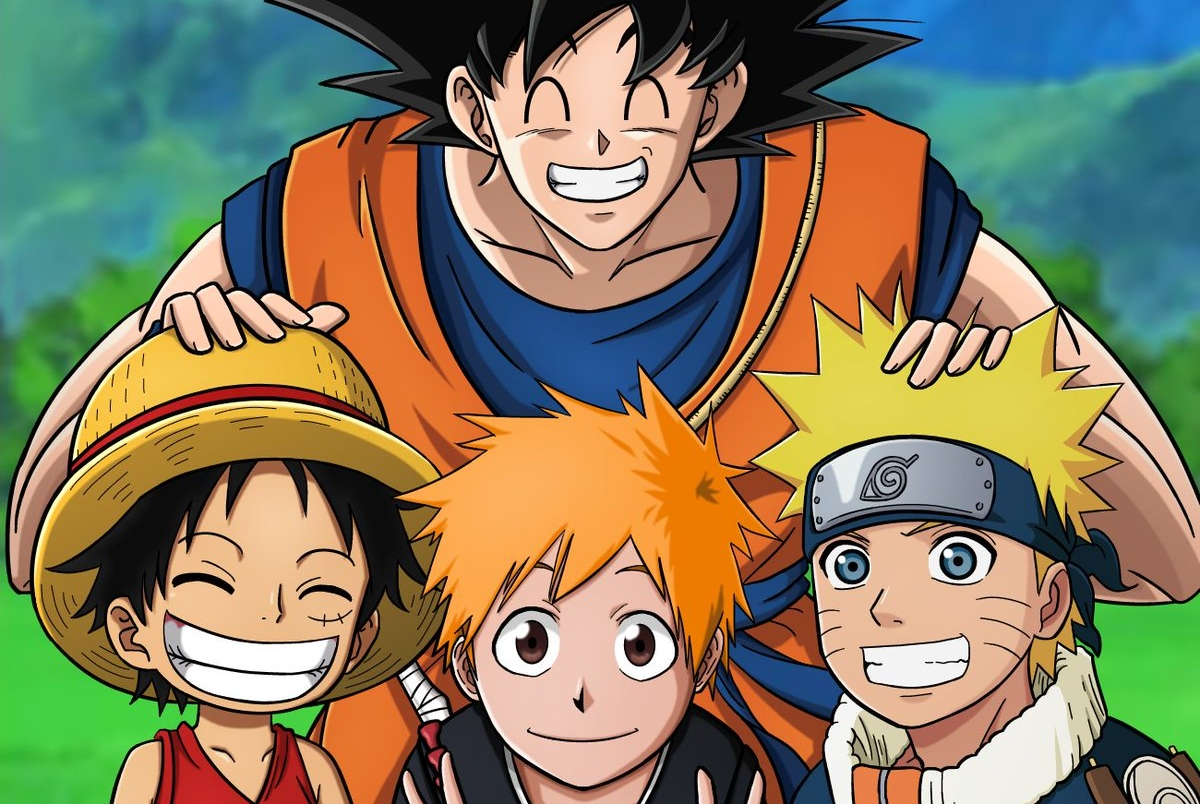Each entry is a show with data that includes:

RANK: score rank on the top 250 list

TITLE

POPULARITY: popularity rank on the 250 list

GENRE

STUDIO

TYPE: TV, Movie, etc.

EPISODES: number of episodes

DURATION: length of each episode in minutes

START_DATE

END_DATE

MEMBERS: number of members who added the anime to their list

SCORE: anime's score, calculated using MAL's weighted scoring. This is calculated using this formula:

Weighted Rank (WR) = *(v / (v + m)) * S + (m / (v + m)) * C*

S = Average score for the Anime (mean).

v = Number of votes for the Anime = (Number of people scoring the Anime).

m = Minimum votes/scores required to get a calculated score (currently 50 
scores required).

C = The mean score across the entire Anime DB.


I will be using many types of model creation techniques, such as Decision Tree, kNN, and MLP and doing parameter grid search to determine the optimal model for this data set.

Popularity is going to be the target for our model. I predict that factors such as Members, Genre, Rank, and Studio will have a profound impact on how popular a show will be on the top 250 list.

# Data
I will now be analyzing the data to look for any existing trends in it.

In [ ]:
data.head()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kankets...,609,"Action, Drama, Suspense",MAPPA,Special,2.0,61,23-Mar,2023,347875.0,9.17
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.0,24,9-Apr,10-Jul,3109951.0,9.11
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.0,24,22-Oct,22-Dec,404036.0,9.09
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.0,24,11-Apr,11-Sep,2393767.0,9.08
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.0,24,15-Apr,16-Mar,581994.0,9.07


In [ ]:
data.shape

(250, 12)

In [ ]:
data.isna().sum()

Rank          0
Title         0
Popularity    0
Genre         1
Studio        2
Type          0
Episodes      1
Duration      0
Start_date    0
End_date      2
Members       2
Score         0
dtype: int64

Some entries in our data set have missing values for certain variables, so I will have to perform a clean up to fill in those missing values.

In [ ]:
data['Genre'] = data['Genre'].fillna(data['Genre'].value_counts().index[0])

In [ ]:
data['Studio'] = data['Studio'].fillna(data['Studio'].value_counts().index[0])

In [ ]:
data['End_date'] = data['End_date'].fillna(data['End_date'].value_counts().index[0])

In [ ]:
data['Episodes'] = data['Episodes'].fillna(data['Episodes'].mean())

In [ ]:
data['Members'] = data['Members'].fillna(data['Members'].mean())

In [ ]:
data.isna().sum()

Rank          0
Title         0
Popularity    0
Genre         0
Studio        0
Type          0
Episodes      0
Duration      0
Start_date    0
End_date      0
Members       0
Score         0
dtype: int64

In [ ]:
for i in range(0,12):
  #print(data)
  print(data[data.columns[i]].describe())

count    250.000000
mean     125.500000
std       72.312977
min        1.000000
25%       63.250000
50%      125.500000
75%      187.750000
max      250.000000
Name: Rank, dtype: float64
count                                                   250
unique                                                  250
top       Shingeki no Kyojin: The Final Season - Kankets...
freq                                                      1
Name: Title, dtype: object
count     250.000000
mean      855.460000
std      1009.330929
min         1.000000
25%       178.250000
50%       490.000000
75%      1139.000000
max      5794.000000
Name: Popularity, dtype: float64
count        250
unique       113
top       Sports
freq          17
Name: Genre, dtype: object
count          250
unique          76
top       Madhouse
freq            17
Name: Studio, dtype: object
count     250
unique      6
top        TV
freq      163
Name: Type, dtype: object
count    250.000000
mean      17.791165
std       23.940450
min 

We can see that Title, Genre, Studio, Start_Date and End_Date are all categorical variables, while the rest are numerical.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
palette_color = sns.color_palette('pastel')



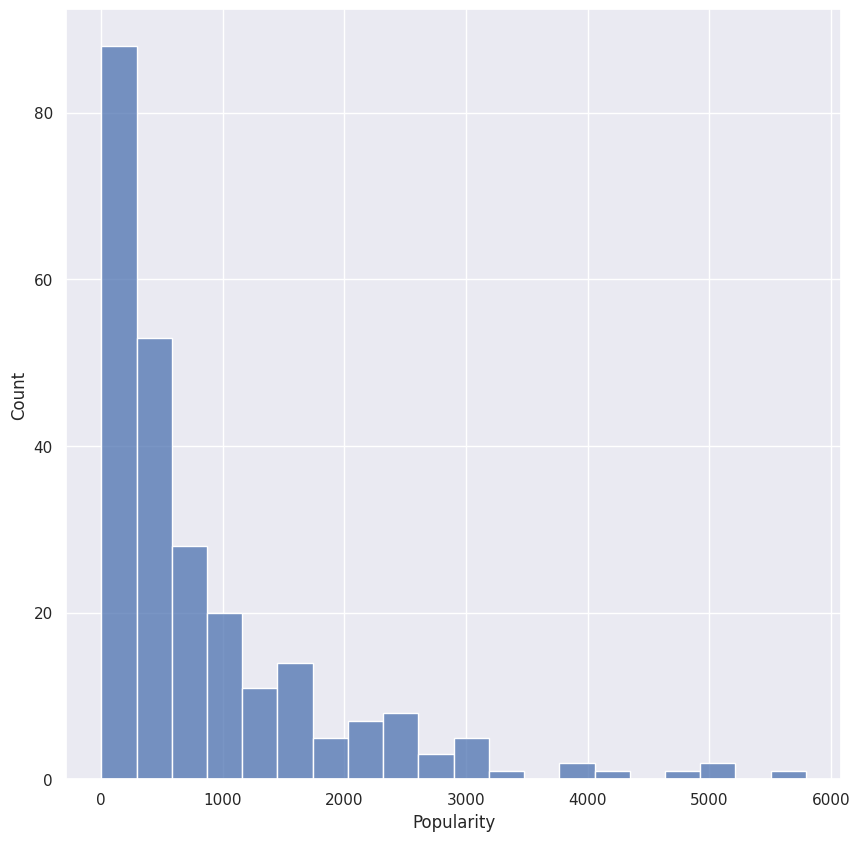

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, x='Popularity', bins=20)
plt.show()

The distribution of popularity is unimodal, but not normal, as the peak is at the far left end of the histogram. This means that animes tend to have a mean popularity score of 0 to 1000, from a range of 0 to 6000. Remember, a lower popularity score means a show is more popular.

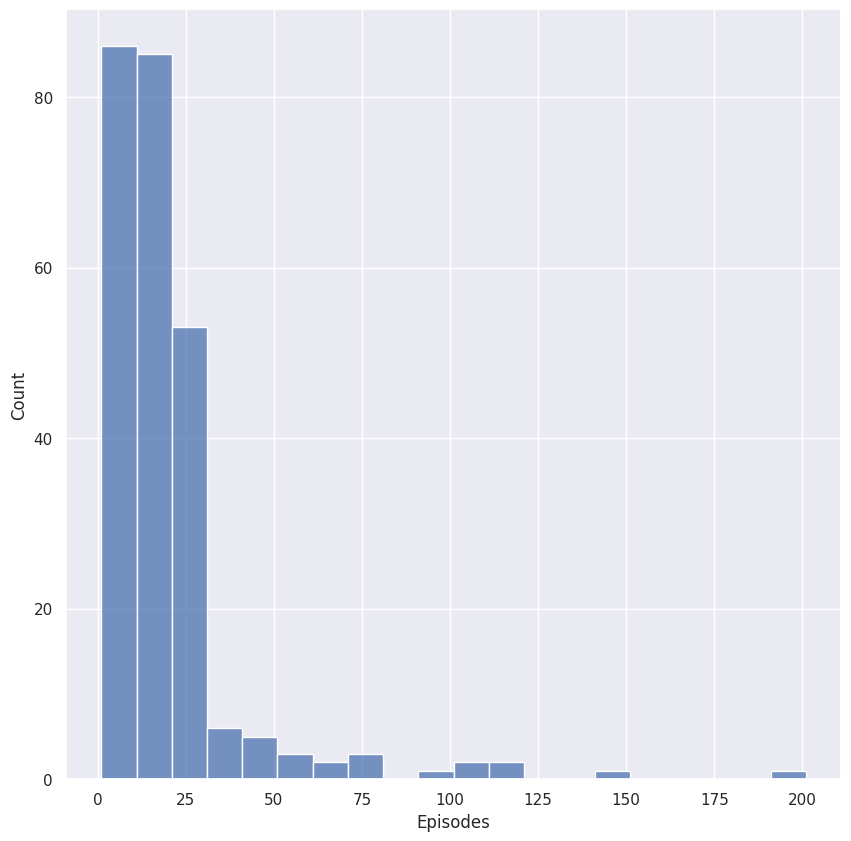

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, x='Episodes', bins=20)
plt.show()

Likewise, the Episodes of Duration is unimodal, but not normal, as the peak is at the far left end of the histogram. This means that animes tend to have an somewher between 0 and 25, from a range of 0 to 200.

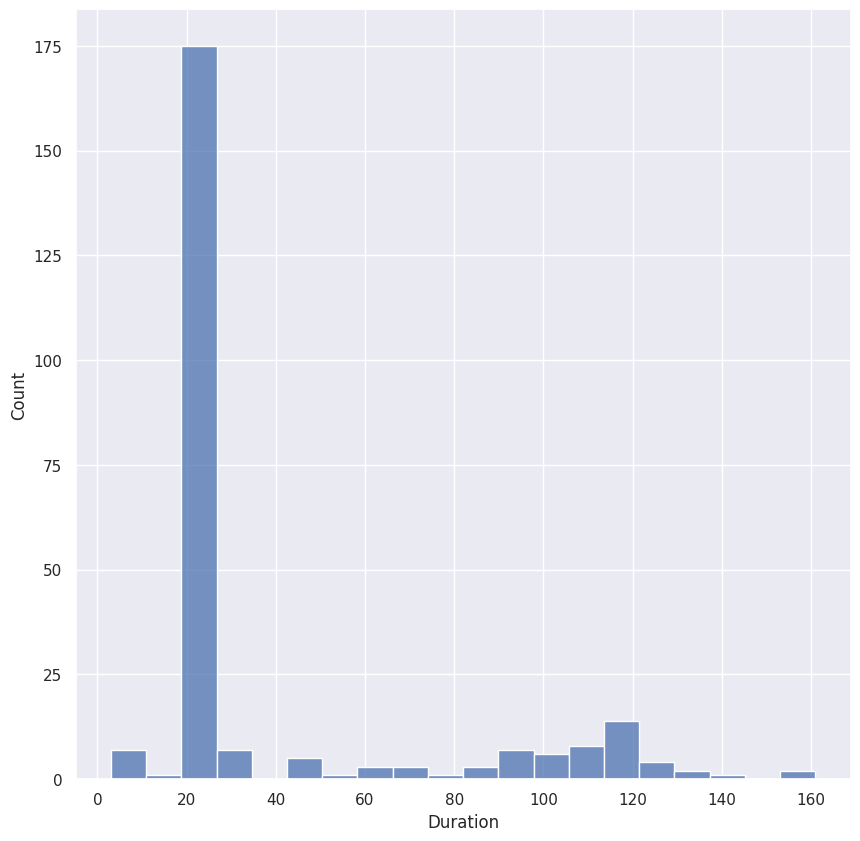

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, x='Duration', bins=20)
plt.show()

Likewise, the distribution of Duration is unimodal, but not normal, as the peak is at the slight left end of the histogram. This means that animes tend to have an episode duration length of around 20 minutes, from a range of 0 to 160 minutes.

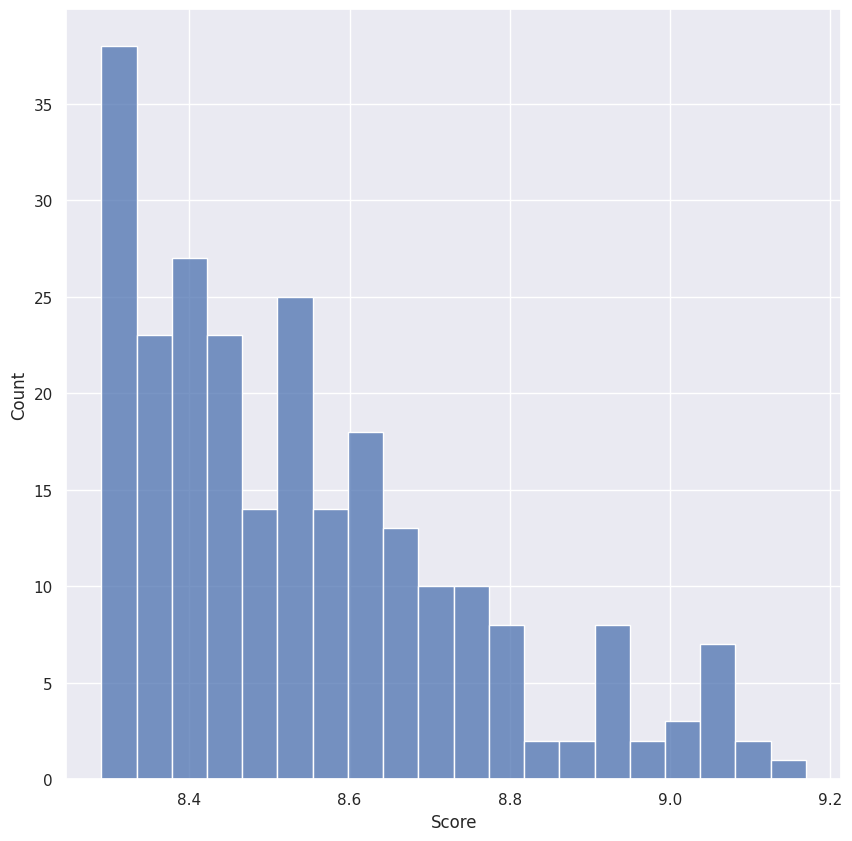

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, x='Score', bins=20)
plt.show()

<Axes: >

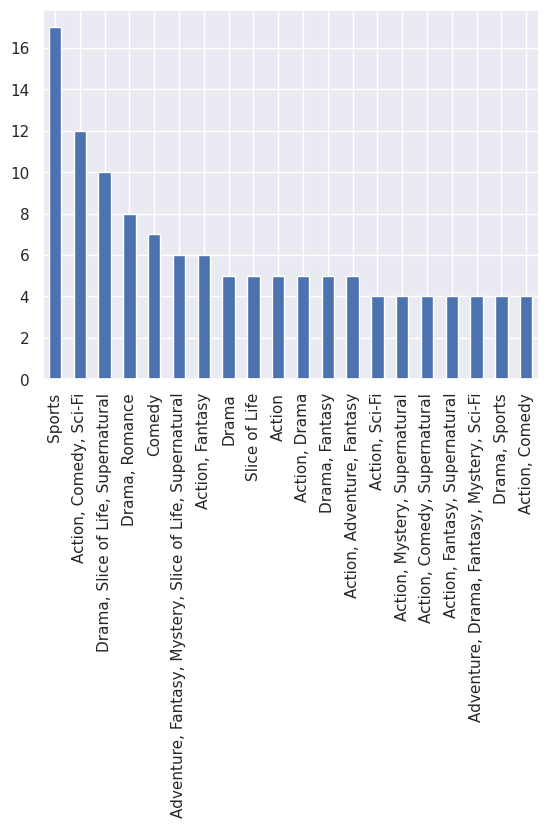

In [ ]:
data['Genre'].value_counts().iloc[:20].plot(kind='bar')

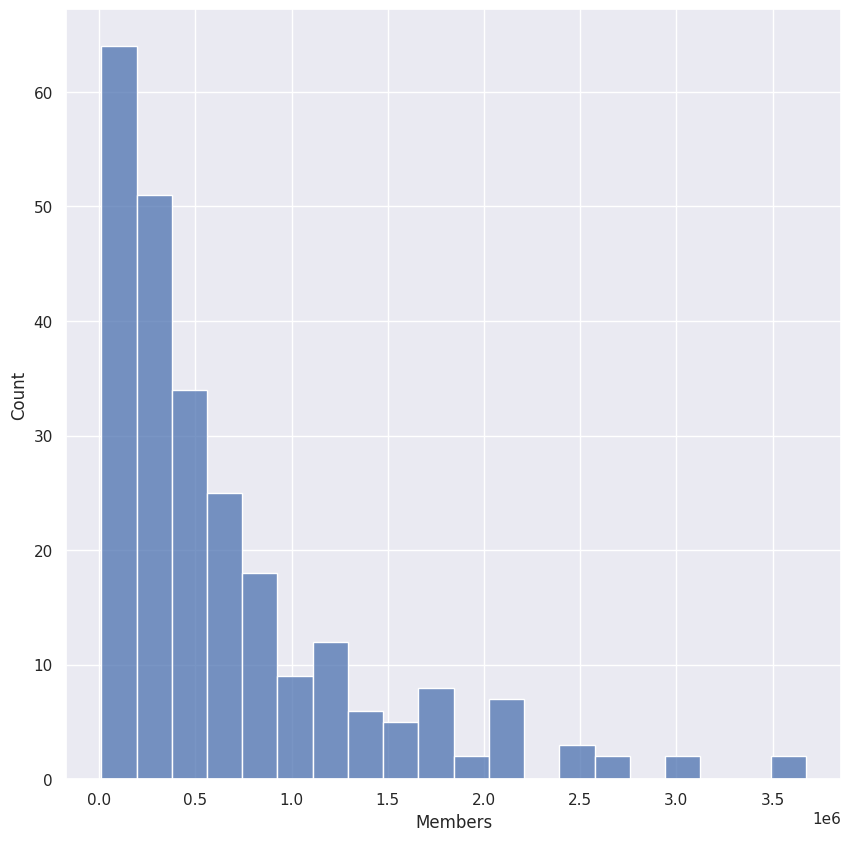

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, x='Members', bins=20)
plt.show()

The majority of animes have a small amount of members, with very few, namely the most popular, having member counts upwards of 3.5 million.

<Axes: >

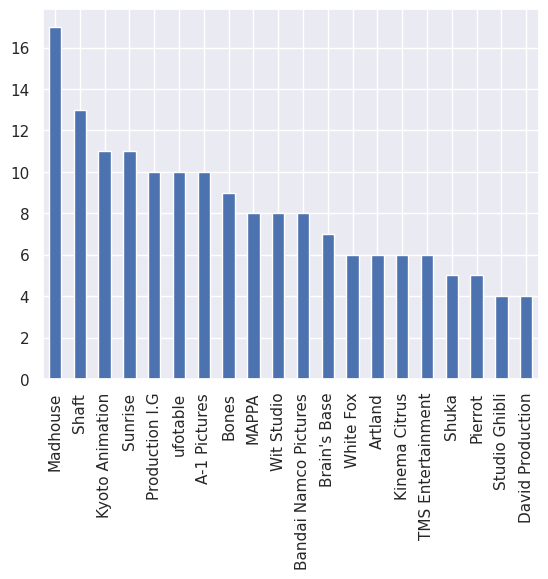

In [ ]:
 data['Studio'].value_counts().iloc[:20].plot(kind='bar')

In [ ]:
data['Type'].value_counts()

TV         163
Movie       54
OVA         10
ONA         10
Special      9
Music        4
Name: Type, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdbd75e97e0>,
 [Text(-0.5055378774171092, 0.9769500777913905, 'TV'),
  Text(0.06906965987838155, -1.0978293957096816, 'Movie'),
  Text(0.8386868299520338, -0.7117614777894409, 'OVA'),
  Text(0.98934581985054, -0.48082725457721615, 'ONA'),
  Text(1.0749949550520241, -0.23320773274635764, 'Special'),
  Text(1.0986106566624674, -0.055268662618726344, 'Music')],
 [Text(-0.275747933136605, 0.5328818606134856, '65%'),
  Text(0.037674359933662666, -0.5988160340234626, '22%'),
  Text(0.4574655436102002, -0.38823353333969496, '4%'),
  Text(0.5396431744639308, -0.2622694115875724, '4%'),
  Text(0.5863608845738313, -0.1272042178616496, '4%'),
  Text(0.5992421763613457, -0.030146543246578, '2%')])

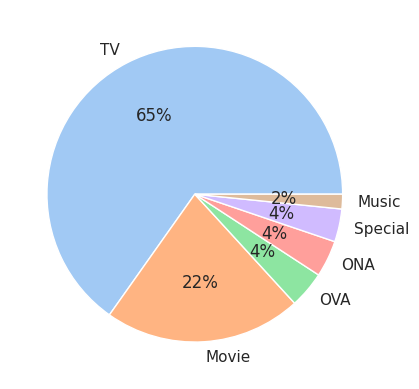

In [ ]:
palette_color = sns.color_palette('pastel')

plt.pie(data['Type'].value_counts(),
        labels =['TV','Movie', 'OVA', 'ONA', 'Special', 'Music'], 
        colors=palette_color, autopct='%.0f%%')

TV seems to be the overwhelming majority when it comes to types for anime, followed by Movie, which is about 1/3 of the size of TV.

I will be preforming exploratory analysis on this dataset to investigate what factors lead to an anime's popularity. More specifically, I will be creating and training a regression model to optiminally predict an anime's popularity given it's parameters.

First, I will drop any variables that bear no effect on the data, and are purely descriptive. These include Title, Start_date, and End_date.

I will also be encoding non-numerical variables such as Genre and Studio. I will also be shortening the Genre labels for each data entry as to drastically decrease the number of values to be encoded for model preparation. This way, it will only use the first genre label, since it is the most common used genre used to describe each show.

In [ ]:
data = data.drop('Title', axis=1)

In [ ]:
data = data.drop('Start_date', axis=1)

In [ ]:
data = data.drop('End_date', axis=1)

In [ ]:
for i in data.index:
  x = data["Genre"][i].split(",")
  data["Genre"][i] = x[0]

<ipython-input-27-e6b7bc9ee9ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Genre"][i] = x[0]


In [ ]:
data["Genre"].value_counts()

Action           101
Drama             54
Comedy            23
Adventure         21
Sports            17
Award Winning     12
Fantasy            5
Slice of Life      5
Mystery            4
Avant Garde        2
 Action            1
Supernatural       1
Romance            1
Music              1
Boys Love          1
Sci-Fi             1
Name: Genre, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Genre"] = le.fit_transform(data['Genre'])
data["Studio"] = le.fit_transform(data['Studio'])
data["Type"] = le.fit_transform(data['Type'])

In [ ]:
data.head()

,Rank,Popularity,Genre,Studio,Type,Episodes,Duration,Members,Score
0,1,609,1,29,4,2.0,61,347875.0,9.17
1,2,3,1,7,5,64.0,24,3109951.0,9.11
2,3,508,1,41,5,13.0,24,404036.0,9.09
3,4,13,7,70,5,24.0,24,2393767.0,9.08
4,5,335,1,6,5,51.0,24,581994.0,9.07


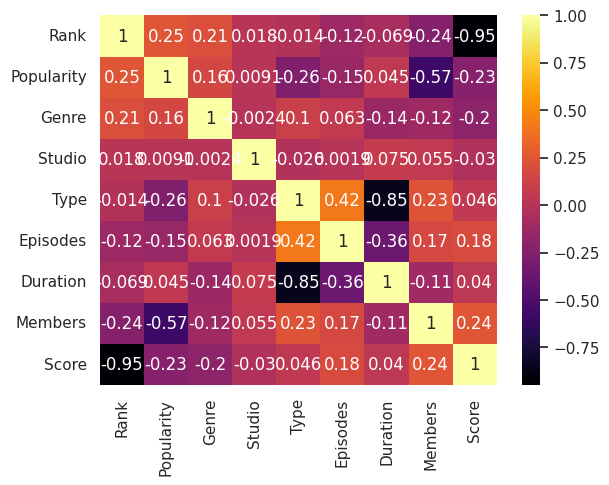

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='inferno');

# Methods
I will now be constructing regression models by performing a 5 fold cross-validation grid-search to find the optimal parameters for each model and determine how much complexity is necessary in order to analyis and predict this dataset.

I will now construct a simple decision tree model. I will perform a 5 fold cross-validation grid-search to find the optimal parameters for our decision tree that doesn't overfit the model. The parameters that will be tuned are the max_depth, which is the the maximum number of decisions in the tree, and splitter, which determines when a splits, or makes a decision.

In [ ]:
features = data.drop('Popularity', axis=1)
target = data['Popularity']

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                    train_size=0.8, test_size=0.2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                    train_size=0.8, test_size=0.2)

dt_model = tree.DecisionTreeRegressor()

cv = KFold(n_splits=5,  shuffle = True)

param_grid = {
    'max_depth': list(range(1,10)), # search 1..10
    'splitter': ['best', 'random']
    }
    
grid_dt = GridSearchCV(dt_model, param_grid, cv=cv)

# performing grid search 
grid_dt.fit(X_train, y_train)

# print out what we found
print("Best parameters: {}".format(grid_dt.best_params_))

Best parameters: {'max_depth': 2, 'splitter': 'best'}


[Text(0.5, 0.8333333333333334, 'Members <= 105415.0\nsquared_error = 1106217.414\nsamples = 200\nvalue = 882.16'),
 Text(0.25, 0.5, 'Members <= 32568.0\nsquared_error = 1088738.444\nsamples = 27\nvalue = 3025.333'),
 Text(0.125, 0.16666666666666666, 'squared_error = 361133.139\nsamples = 6\nvalue = 4787.167'),
 Text(0.375, 0.16666666666666666, 'squared_error = 156359.95\nsamples = 21\nvalue = 2521.952'),
 Text(0.75, 0.5, 'Members <= 287699.5\nsquared_error = 280209.456\nsamples = 173\nvalue = 547.676'),
 Text(0.625, 0.16666666666666666, 'squared_error = 90427.008\nsamples = 46\nvalue = 1191.761'),
 Text(0.875, 0.16666666666666666, 'squared_error = 144266.316\nsamples = 127\nvalue = 314.386')]

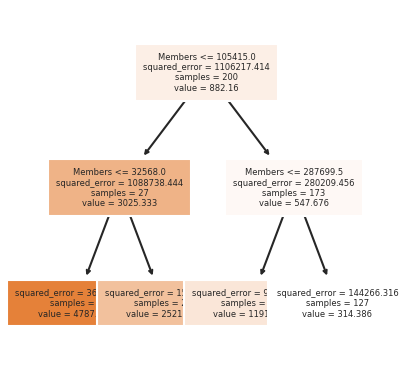

In [ ]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=150)
plot_tree(grid_dt.best_estimator_, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               )

I will now construct a random forest model, which instead of creating a single tree, a random forest creates multiple trees and takes the average as the model. I will perform a 5 fold cross-validation grid-search to find the optimal parameters for our decision tree that doesn't overfit the model. The parameters that will be tuned are the n_estimators, which is the number of trees, max_features, which is the maximum number of features considered before splitting a node, max_depth, min_samples_split, which is the minmum number if data points in a node before a split, and min_samples_leaf, which is the same as the previous but for leaves.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                    train_size=0.8, test_size=0.2)

rf_model = RandomForestRegressor()

cv = KFold(n_splits=5,  shuffle = True)

param_grid_1 = {'n_estimators': [i*10 for i in range(1,10)],
               'max_features':  ['sqrt'],
               'max_depth': list(range(1,10)),
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':[1, 2, 4],
               'bootstrap':[True, False]}

grid_rf = GridSearchCV(rf_model, param_grid_1, cv=cv)

# performing grid search 
grid_rf.fit(X_train, y_train)

# print out what we found
print("Best parameters: {}".format(grid_rf.best_params_))

Best parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}


[Text(0.5, 0.9, 'Rank <= 131.5\nsquared_error = 948953.874\nsamples = 125\nvalue = 891.775'),
 Text(0.29545454545454547, 0.7, 'Studio <= 69.0\nsquared_error = 627341.392\nsamples = 73\nvalue = 698.719'),
 Text(0.18181818181818182, 0.5, 'Members <= 164552.0\nsquared_error = 646435.34\nsamples = 66\nvalue = 752.405'),
 Text(0.09090909090909091, 0.3, 'Genre <= 6.5\nsquared_error = 512795.76\nsamples = 11\nvalue = 2151.381'),
 Text(0.045454545454545456, 0.1, '\n  (...)  \n'),
 Text(0.13636363636363635, 0.1, '\n  (...)  \n'),
 Text(0.2727272727272727, 0.3, 'Score <= 8.625\nsquared_error = 114398.644\nsamples = 55\nvalue = 425.978'),
 Text(0.22727272727272727, 0.1, '\n  (...)  \n'),
 Text(0.3181818181818182, 0.1, '\n  (...)  \n'),
 Text(0.4090909090909091, 0.5, 'Studio <= 73.0\nsquared_error = 28286.36\nsamples = 7\nvalue = 102.8'),
 Text(0.36363636363636365, 0.3, 'squared_error = 1231.388\nsamples = 4\nvalue = 34.571'),
 Text(0.45454545454545453, 0.3, 'squared_error = 55208.0\nsamples = 3\n

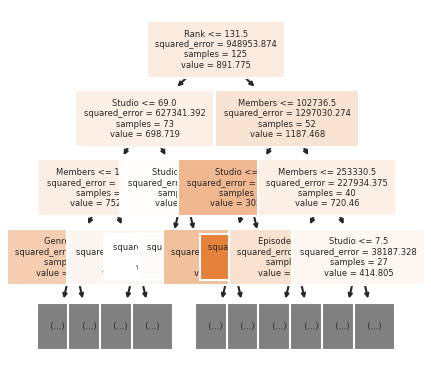

In [ ]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=150)
plot_tree(grid_rf.best_estimator_.estimators_[0], fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               )

I will now construct a xgboost model, which is like a random forest, but instead of taking the average of many weak models, it combines them to produce one powerful model. I will perform a 5 fold cross-validation grid-search to find the optimal parameters for our decision tree that doesn't overfit the model. The parameters that will be tuned are the n_estimators, booster, which is the type of model to use for each iteration, max_depth, learning_rate, which is the step size at which the algorithm makes updates to the model weights, and min_child_weight, which is the minimum weight for each child model.

In [ ]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                    train_size=0.8, test_size=0.2)

xg_model = xgb.XGBRegressor()

cv = KFold(n_splits=5,  shuffle = True)

param_grid_2 = { 'n_estimators' : [100, 500, 900, 1100, 1500],
               'max_depth' : [2, 3, 5, 10, 15],
               'booster' : ['gbtree','gblinear'],
               'learning_rate' : [0.05,0.1,0.15,0.20],
               'min_child_weight' : [1,2,3,4]}

grid_xg = GridSearchCV(rf_model, param_grid_1, cv=cv)

# performing grid search 
grid_xg.fit(X_train, y_train)

# print out what we found
print("Best parameters: {}".format(grid_xg.best_params_))

Best parameters: {'bootstrap': False, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


[Text(0.4375, 0.9, 'Members <= 122748.0\nsquared_error = 1026392.3\nsamples = 200\nvalue = 825.02'),
 Text(0.20833333333333334, 0.7, 'Type <= 1.5\nsquared_error = 1185383.006\nsamples = 30\nvalue = 2753.833'),
 Text(0.125, 0.5, 'Duration <= 113.5\nsquared_error = 1304359.653\nsamples = 11\nvalue = 3257.273'),
 Text(0.08333333333333333, 0.3, 'Rank <= 186.0\nsquared_error = 858608.688\nsamples = 8\nvalue = 2913.75'),
 Text(0.041666666666666664, 0.1, '\n  (...)  \n'),
 Text(0.125, 0.1, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.3, 'squared_error = 1339174.222\nsamples = 3\nvalue = 4173.333'),
 Text(0.2916666666666667, 0.5, 'Studio <= 61.0\nsquared_error = 884815.075\nsamples = 19\nvalue = 2462.368'),
 Text(0.25, 0.3, 'Rank <= 178.5\nsquared_error = 296114.484\nsamples = 16\nvalue = 2324.875'),
 Text(0.20833333333333334, 0.1, '\n  (...)  \n'),
 Text(0.2916666666666667, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'squared_error = 3386001.556\nsamples = 3\nvalue = 3195.667'),
 

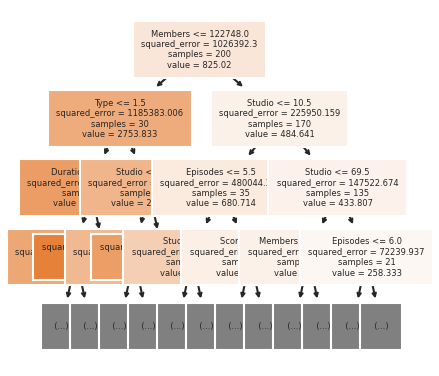

In [ ]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=150)
plot_tree(grid_xg.best_estimator_.estimators_[0], fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 21.9 MB/s eta 0:00:00


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


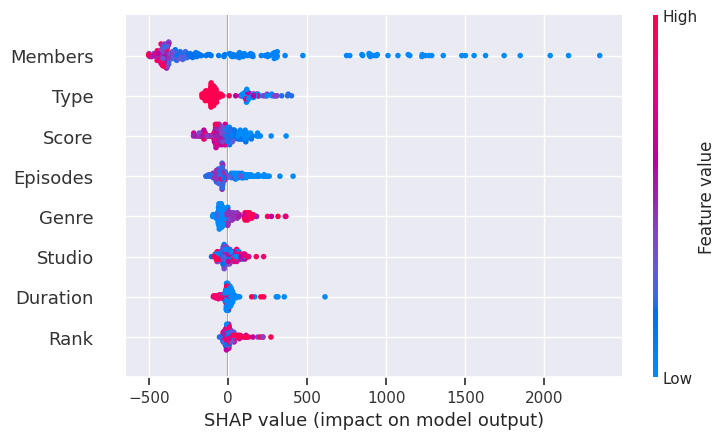

In [ ]:
!pip install shap

import shap

explainer = shap.Explainer(grid_xg.best_estimator_)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

#Results
I will now analyze the accuracies of the models to determine the efficacy of each one in prediction of the dataset.

In [ ]:
def regression_confint(rs_score, n, k):

    import math
    interval = 2*math.sqrt((4*rs_score*(1-rs_score)**2*(n-k-1)**2)/((n**2 - 1)*(n+3)))
    lb = max(0, rs_score - interval)
    ub = min(1.0, rs_score + interval)
    return (lb,ub)

In [ ]:
def balanced_accuracy_score(model, X_train, X_test, y_train): 
  from sklearn.metrics import balanced_accuracy_score
 
  model.fit(X_train, y_train)
  # Prediction using Testing data
  pred_test = model.predict(X_test)
  #calculate the balanced accuracy by comparing the true testing target and the predicted values
  return balanced_accuracy_score(y_test, pred_test)

In [ ]:
variables = 7
observations = 250
pred_dt_train = grid_dt.best_estimator_.predict(X_train)
pred_dt_test = grid_dt.best_estimator_.predict(X_test)
rs_score = metrics.r2_score(y_test, pred_dt_test)
lb,ub = regression_confint(rs_score, observations, variables)
print("R^2 Score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs_score,lb,ub))

R^2 Score: 0.91 (0.89, 0.93)


In [ ]:
pred_rf_train = grid_rf.best_estimator_.predict(X_train)
pred_rf_test = grid_rf.best_estimator_.predict(X_test)
rs_score = metrics.r2_score(y_test, pred_rf_test)
lb,ub = regression_confint(rs_score, observations, variables)
print("R^2 Score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs_score,lb,ub))

R^2 Score: 0.94 (0.92, 0.95)


In [ ]:
pred_xg_train = grid_xg.best_estimator_.predict(X_train)
pred_xg_test = grid_xg.best_estimator_.predict(X_test)
rs_score = metrics.r2_score(y_test, pred_xg_test)
lb,ub = regression_confint(rs_score, observations, variables)
print("R^2 Score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs_score,lb,ub))

R^2 Score: 0.90 (0.87, 0.92)


In [ ]:
def model_metrics(y_true, y_predict, mode):
  accuracy= metrics.r2_score(y_true, y_predict)
  mean_square = metrics.mean_squared_error(y_true, y_predict)
  if mode == "r":
    return [accuracy]
  elif mode == "m":
    return [mean_square]
  

dt_train_metrics = model_metrics(y_train, pred_dt_train, "r")

dt_test_metrics = model_metrics(y_test, pred_dt_test, "r")

rf_train_metrics = model_metrics(y_train, pred_rf_train, "r")

rf_test_metrics = model_metrics(y_test, pred_rf_test, "r")

xg_train_metrics = model_metrics(y_train, pred_xg_train, "r")

xg_test_metrics = model_metrics(y_test, pred_xg_test, "r")

In [ ]:
df_dt = pd.DataFrame([ dt_train_metrics, dt_test_metrics],  columns=['R2 Score'], 
                      index =['Train', 'Test'] )
df_rf = pd.DataFrame([ rf_train_metrics, rf_test_metrics],  columns=['R2 Score'], 
                      index =['Train', 'Test'] )
df_xg = pd.DataFrame([ xg_train_metrics, xg_test_metrics],  columns=['R2 Score'], 
                      index =['Train', 'Test'] )

In [ ]:
import plotly.graph_objects as go

def plot_bar_results(dataset_type, all_metrics_values):
    fig = go.Figure()
    for model_name, metrics_df in all_metrics_values.items():
        metrics_names = list(metrics_df.columns)
        values = metrics_df.loc[dataset_type].to_numpy()
        fig.add_trace(go.Bar(y=values, x=metrics_names, name=model_name))
    fig.update_layout(barmode="group", xaxis_tickangle=-45, title_text=dataset_type+" Dataset")
    fig.show()

In [ ]:
all_metrics_values={"Decision Tree": df_dt,
                    "Random Forest": df_rf,
                    "XGBoost": df_xg}
plot_bar_results("Train", all_metrics_values)
plot_bar_results("Test", all_metrics_values)

In [ ]:
dt_train_metrics = model_metrics(y_train, pred_dt_train, "m")

dt_test_metrics = model_metrics(y_test, pred_dt_test, "m")

rf_train_metrics = model_metrics(y_train, pred_rf_train, "m")

rf_test_metrics = model_metrics(y_test, pred_rf_test, "m")

xg_train_metrics = model_metrics(y_train, pred_xg_train, "m")

xg_test_metrics = model_metrics(y_test, pred_xg_test, "m")


df_dt = pd.DataFrame([ dt_train_metrics, dt_test_metrics],  columns=['Mean Square Error'], 
                      index =['Train', 'Test'] )
df_rf = pd.DataFrame([ rf_train_metrics, rf_test_metrics],  columns=['Mean Square Error'], 
                      index =['Train', 'Test'] )
df_xg = pd.DataFrame([ xg_train_metrics, xg_test_metrics],  columns=['Mean Square Error'], 
                      index =['Train', 'Test'] )

all_metrics_values={"Decision Tree": df_dt,
                    "Random Forest": df_rf,
                    "XGBoost": df_xg}
plot_bar_results("Train", all_metrics_values)
plot_bar_results("Test", all_metrics_values)

#Conclusion

We can see that from the metrics of the training and testing datasets, that our best performing model is the random forest model. The xgboost model had the best R2 score when it came to training, but falls just below that of the random forest model when it comes to testing. Likewise, The xgboost model's mean square error is demonstrably low compared to the other two models, but it drastically increases when it comes to testing, which is an inverse of the random forest. Looking at the confidence intervals, we see that the decision tree has an average R2 score of 0.91 (0.89, 0.93), the random forest has an average R2 score of 0.94 (0.92, 0.95), and the xgboost model has an average R2 score of  0.90 (0.87, 0.92).

Overall, I can say that the random forest model is the best performing model, but judging from the other two models, it's not much of a substaintial upgrade. We can see from the overlap of the confidence intervals that the difference between the three models is statistically insignificant. I would have no preference for one model over the other. Also considering the fact that the random forest and the xgboost models are very computationally expensive, each taking 10 minutes to search for the optimal parameters through grid search, and the fact that they performed very similarlly to the decision tree model, a relatively simple model, there's no need to resort highly complex model search algorithms when it comes to predicting this dataset. I can confidently say that the popularity of an anime can be predicted on the top 250 anime list.